# MAC0317/MAC5920
## Introdução ao Processamento de Sinais Digitais
### Seção 3.6: A DCT 2D

In [1]:
import math as m
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from urllib.request import urlopen

### Motivações para a DCT bidimensional

- permitir a compressão de imagens eliminando as descontinuidades de borda da DFT;
- a ideia é usar o mesmo princípio de espelhamento do caso 1D, mas nos eixos $x$ e $y$;
- podemos definir a transformada 2D usando a transformada 1D (DCT das linhas / DCT das colunas)

In [2]:
# função auxiliar: converte imagem colorida para cinza
def rgb2gray(rgb):
    fil = [0.299, 0.587, 0.144]
    return np.dot(rgb, fil)
def plota_imagem_espelhada():
    # Carrega a imagem da internet e converte para nível de cinza
    url = "http://sutherncharm.files.wordpress.com/2009/09/double-ferris.jpg"
    M = rgb2gray(imread(urlopen(url).read()))
    MM_upper = np.hstack((M, np.flip(M,1)))
    MM = np.vstack((MM_upper, np.flip(MM_upper,0)))
    plt.figure(figsize=(5,8)); plt.imshow(MM, cmap='gray')
    plt.axis("off")
    plt.title("Figura 3.11: Reflexões da imagem da roda-gigante")
    plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  


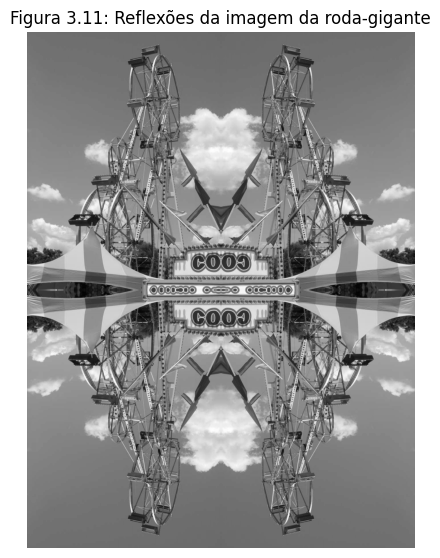

In [3]:
plota_imagem_espelhada()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  after removing the cwd from sys.path.


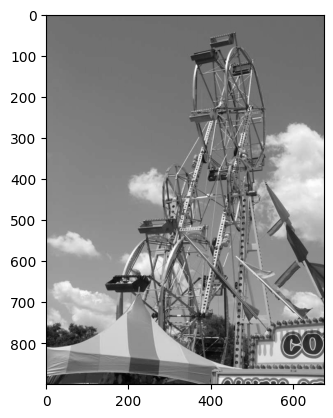

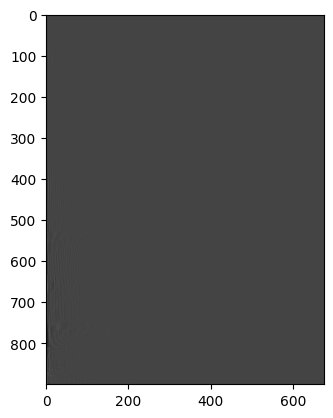

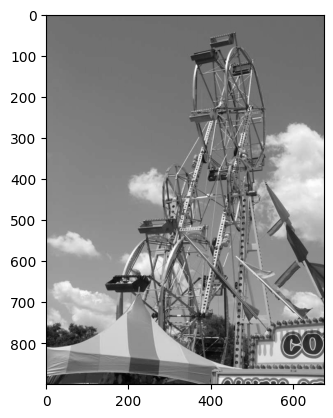

In [14]:
import scipy.fft as spfft 

url = "http://sutherncharm.files.wordpress.com/2009/09/double-ferris.jpg"
imagem = rgb2gray(imread(urlopen(url).read()))
imagem.shape
plt.imshow(imagem, cmap='gray')

imagem_hat = spfft.dct(imagem, norm='ortho')
plt.figure()
plt.imshow(imagem_hat, cmap='gray')

plt.figure()
imagem_original = spfft.idct(imagem_hat, norm='ortho')
plt.imshow(imagem_original, cmap='gray')


Considerando $DCT(x) = C_Nx$ e $IDCT(C) = C_N^T C$, podemos definir uma transformação em 2D, para uma matriz $A\in M_{M\times N}(\mathbb{C})$ qualquer, assim:

\begin{equation*}
	\hat{A} = DCT(A) = C_M AC_N^T (\in M_{M\times N}(\mathbb{C}))
\end{equation*}

cuja inversa será dada por

\begin{equation*}
	A = IDCT(\hat{A}) = C_M^T \hat{A} C_N
\end{equation*}

Lembrando dos coeficientes das matrizes $C_M$ e $C_N^T$, temos:

\begin{equation*}
	(C_M)_{k,m} = \left\{\begin{array}{ll}
		\sqrt{\frac{1}{M}} & \text{ se }k = 0 \\
		\sqrt{\frac{2}{M}}\cos\left(\frac{\pi k\left(m + \frac{1}{2}\right)}{M}\right) & \text{ se } k = 1, 2, \dots, M-1
	\end{array}\right.
\end{equation*}

\begin{equation*}
	(C_N)^T_{n,l} = \left\{\begin{array}{ll}
		\sqrt{\frac{1}{N}} & \text{ se }l = 0 \\
		\sqrt{\frac{2}{N}}\cos\left(\frac{\pi l\left(n + \frac{1}{2}\right)}{N}\right) & \text{ se } l = 1, 2, \dots, N-1
	\end{array}\right.
\end{equation*}

Assim

\begin{equation*}
	\hat{A}_{k,l} = u_k v_l\sum\limits_{m = 0}^{M-1}\sum\limits_{n = 0}^{N-1} A_{mn}\cos\left(\frac{\pi k\left(m + \frac{1}{2}\right)}{M}\right)\cos\left(\frac{\pi l\left(n + \frac{1}{2}\right)}{N}\right)
\end{equation*}

onde

\begin{equation*}
	u_k = \left\{\begin{array}{ll}
		\sqrt{\frac{1}{M}} & \text{ se } k = 0 \\
		\sqrt{\frac{2}{M}} & \text{ se } k \neq 0 \\
	\end{array}\right.\quad\quad
    v_l = \left\{\begin{array}{ll}
		\sqrt{\frac{1}{N}} & \text{ se } l = 0 \\
		\sqrt{\frac{2}{N}} & \text{ se } l \neq 0 \\
	\end{array}\right.
\end{equation*}

**Observação:** $A\in \mathcal{M}_{M\times N}(\mathbb{R}) \Leftrightarrow \hat{A}\in \mathcal{M}_{M\times N}(\mathbb{R})$.

In [19]:
# tentativa 3 utilizando os somatórios
def dct2d_3(A):
    M, N = A.shape
    
    A_hat = np.zeros((M,N))
    
    for k in range(M):
        for l in range(N):
            for r in range(M):
                for s in range(N):
                    norm_k = np.sqrt((1+(k>0))/M)
                    norm_l = np.sqrt((1+(l>0))/N)
                    A_hat[k][l] += norm_k * norm_l * A[r][s] * np.cos((math.pi*k*(r+0.5))/M) * np.cos((math.pi*l*(s+0.5))/N)
    return A_hat

test_dct2d(dct2d_3,20,12)

Teste passou! 


In [16]:
# tentativa 1 utilizando matrizes
import numpy as np
import math 
import scipy.fft as spfft

def build_DCT_base(N=4):
    res = np.zeros((N,N))
    k = np.arange(1, N, 1).reshape((N-1,1))
    m = np.arange(0, N, 1).reshape((1,N))
    fatores = k * m
    res[0:] = np.sqrt(1/N)
    res[1:] = np.sqrt(2/N) * np.cos(math.pi*k*(m+0.5)/N )
    return res


def dct2d(A):
    m, n = A.shape
    
    base_m = build_DCT_base(m)
    base_n = build_DCT_base(n)
    
    tmp1 = np.matmul(base_m, A)
    
    return np.matmul(tmp1, base_n.T)
    
def idct2d(Ahat):
    m, n = Ahat.shape
    
    base_m = build_DCT_base(m)
    base_n = build_DCT_base(n)
    
    tmp1 = np.matmul(base_m.T, Ahat)
    
    return np.matmul(tmp1, base_n)
    

def test_dct2d(dut, M=100, N=40):
    A = np.random.randn(M*N).reshape((M,N))
    
    golden = spfft.dctn(A, norm='ortho')
    result = dut(A)
    
    assert np.allclose(golden, result) == True , 'Teste falhou!'
    print('Teste passou! ')
    
# plt.imshow(idct2d(dct2d(imagem)), cmap='gray')
# plt.imshow(idct2d(spfft.dctn(imagem, norm='ortho')), cmap='gray')
# plt.imshow(spfft.idctn(dct2d(imagem), norm='ortho'), cmap='gray')

test_dct2d(dct2d,800,1234)

Teste passou! 


In [11]:
# tentativa 2 utilizando dct1d sobre linhas e colunas
def dct2d_2(A):
    m, n = A.shape
    
    tmp1 = np.zeros((m,n))
    tmp2 = np.zeros((n,m))
    for row in range(m):
        #tmp1[row] = spfft.dct(A[row], norm='ortho')
        tmp1[row] = dct1(A[row])
    for col in range(n):
        tmp2[col] = dct1(tmp1.T[col])
    Ahat = tmp2.T
    return Ahat

test_dct2d(dct2d_2,80,123)

True

In [9]:
def dct1(x):
    N = len(x)
    m = np.arange(0,N,1)
    X = np.zeros(N)
    
    for k in range(N):
        X[k] = np.sqrt((1+(k>0))/N) * np.sum(x*np.cos((math.pi*k*(m+0.5))/N))
        
    return X

def test_dct(dut, N=40):
    x = np.random.randn(N)
    
    golden = spfft.dct(x, norm='ortho')
    result = dut(x)
    
    assert np.allclose(golden, result) == True , f'Teste falhou! \nGOLDEN:\t{golden} \nDUT:\t{result}'
    print('Teste passou! ')

test_dct(dct1,4)

Teste passou! 


## Formas básicas 2D para a DCT

Note que é possível escrever

$$\hat{A}_{k,l} = \left(A,\mathcal{C}_{k,l}\right)$$

onde

\begin{equation*}
	\left(\mathcal{C}_{k,l}\right)_{m,n} = u_k v_l\cos\left(\frac{\pi k\left(m + \frac{1}{2}\right)}{M}\right)\cos\left(\frac{\pi l\left(n + \frac{1}{2}\right)}{N}\right).
\end{equation*}

Portanto, a DCT pode ser vista como a mudança de base da matriz $A$ para a base $\{\mathcal{C}_{k,l}\mid k=0,\ldots,M-1,\quad l=0,\ldots,N-1\}$.

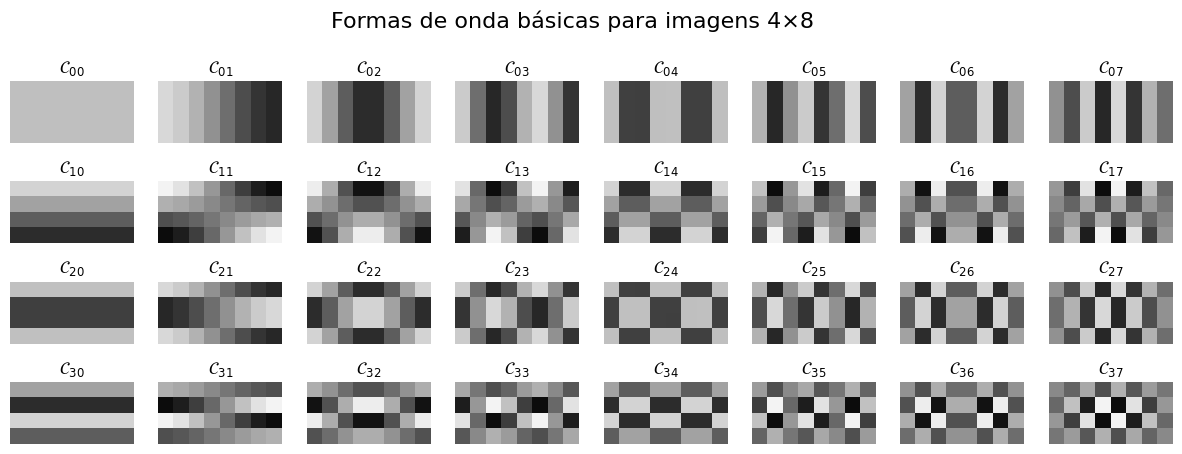

In [4]:
M=4;N=8; fig, ax = plt.subplots(M,N,figsize=(15,5))
i = np.arange(0,M); j = np.arange(0,N); i, j = np.meshgrid(i,j,indexing='ij')
for k in range(M):
  for l in range(N):
    f =  m.sqrt((1+(k>0))/M)*m.sqrt((1+(l>0))/N)*np.cos((m.pi/M)*k*(i+0.5))*np.cos((m.pi/N)*l*(j+0.5))
    ax[k][l].imshow(f,cmap='gray',vmin=-m.sqrt(2/M)*m.sqrt(2/N),vmax=+m.sqrt(2/M)*m.sqrt(2/N));ax[k][l].axis("off")
    ax[k][l].set_title(r"$\mathcal{{C}}_{{{}{}}}$".format(k,l))
fig.suptitle(r'Formas de onda básicas para imagens {}×{}'.format(M,N), fontsize=16, y=1)
plt.show()